In [33]:
import pickle
import matplotlib.pyplot as plt
from scipy.spatial.distance import hamming
import numpy as np

In [2]:
with open('NK_landscapes_6.txt', 'rb') as f:
    landscapes = pickle.load(f)

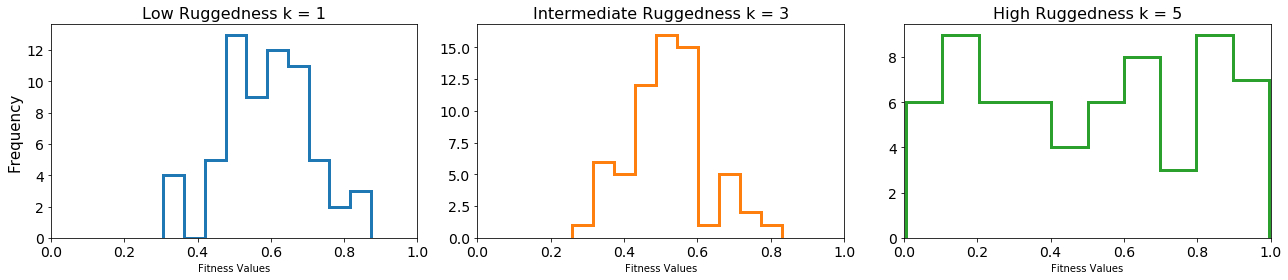

In [59]:
fig, ax = plt.subplots(1,3,figsize = (18,4))

ax[0].hist(list(landscapes[1].values()), histtype = 'step', color = 'C0', linewidth = 3.)
ax[1].hist(list(landscapes[3].values()), histtype = 'step', color = 'C1', linewidth = 3.)
ax[2].hist(list(landscapes[5].values()), histtype = 'step', color = 'C2', linewidth = 3.)

ax[0].set_title('Low Ruggedness k = 1', fontsize = 16)
ax[1].set_title('Intermediate Ruggedness k = 3', fontsize = 16)
ax[2].set_title('High Ruggedness k = 5', fontsize = 16)

for i in range(3):
    ax[i].set_xlim(0,1)
    ax[i].tick_params(labelsize = 14)
    ax[i].set_xlabel('Fitness Values')

ax[0].set_ylabel('Frequency', fontsize = 15)

plt.tight_layout()
plt.savefig('NK_landscape_fitness_values.jpg', dpi = 400)

In [34]:
genotypes = [g for g in landscapes[1].keys()]
distances_1 = []
for g in genotypes:
    one_n = [x for x in genotypes if hamming(list(x),list(g)) == 1/(len(x))]
    distance = np.mean([np.abs(landscapes[1][x] - landscapes[1][g]) for x in one_n])
    distances_1.append(distance)

In [35]:
genotypes = [g for g in landscapes[3].keys()]
distances_3 = []
for g in genotypes:
    one_n = [x for x in genotypes if hamming(list(x),list(g)) == 1/(len(x))]
    distance = np.mean([np.abs(landscapes[3][x] - landscapes[3][g]) for x in one_n])
    distances_3.append(distance)

In [36]:
genotypes = [g for g in landscapes[5].keys()]
distances_5 = []
for g in genotypes:
    one_n = [x for x in genotypes if hamming(list(x),list(g)) == 1/(len(x))]
    distance = np.mean([np.abs(landscapes[5][x] - landscapes[5][g]) for x in one_n])
    distances_5.append(distance)

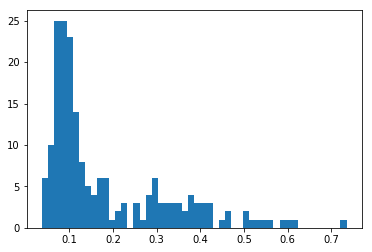

In [48]:
bins = plt.hist(np.hstack((distances_1, distances_3, distances_5)), bins = 50)[1]

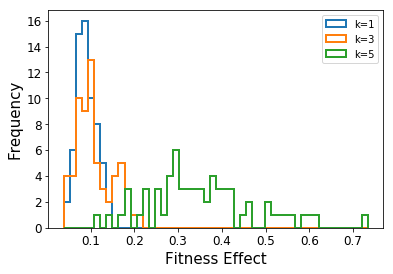

In [58]:
fig, ax = plt.subplots()

ax.hist(distances_1, bins = bins, histtype = 'step', color = 'C0', linewidth = 2.)
ax.hist(distances_3, bins = bins, histtype = 'step', color = 'C1', linewidth = 2.)
ax.hist(distances_5, bins = bins, histtype = 'step', color = 'C2', linewidth = 2.)

ax.set_xlabel('Fitness Effect', fontsize = 15)
ax.set_ylabel('Frequency', fontsize = 15)

ax.tick_params(labelsize = 12)
ax.legend(['k=1', 'k=3', 'k=5'])

plt.savefig('NK_landscape_fitness_effect.jpg', dpi = 400)
plt.show()